# Graph from the DataFrame saved in BASEP Current Density Analysis

In [1]:
#Imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.optimize as spo
import pint

from tqdm import tqdm_notebook

idx = pd.IndexSlice
%matplotlib inline

from scipy.interpolate import make_interp_spline, BSpline

In [2]:
#Loading the tracking matrix from csv file 
filePath = "C:/Users/Eric/Desktop/curves.dat" #No coordinates, correct file is CurrentDensity
df = pd.read_csv(filePath ,sep = "\t", index_col=[0,1,2])
df.head()

File Name  N particles  co_error    co_vel  \
sigma test p_density                                                     
0.98  0    0.04       Test11_20190426          1.0  0.000000  0.601122   
      1    0.11       Test10_20190426          3.0  0.000898  0.601122   
      2    0.22        Test9_20190426          6.0  0.001070  0.601122   
      3    0.34        Test8_20190426          9.0  0.001369  0.601122   
      4    0.41        Test7_20190426         11.0  0.001291  0.601122   

                        codens  fix_error   fix_vel   fixdens   lambda  omega  \
sigma test p_density                                                            
0.98  0    0.04       0.024045   0.000000  0.111982  0.004479  4.10968   0.72   
      1    0.11       0.065017   0.000382  0.111982  0.013152  4.10968   0.72   
      2    0.22       0.125495   0.000410  0.111982  0.031029  4.10968   0.72   
      3    0.34       0.192198   0.000397  0.111982  0.050400  4.10968   0.72   
      4    0.41       0.228949   0.000496  0.111982  0.064394  4.10968   0.72   

                      radius  sing_codens  sing_fixdens  norm_codens  \
sigma test p_density                                                   
0.98  0    0.04       17.488     0.022483      0.004188     1.069478   
      1    0.11       17.488     0.022483      0.004188     2.891841   
      2    0.22       17.488     0.022483      0.004188     5.581830   
      3    0.34       17.488     0.022483      0.004188     8.548661   
      4    0.41       17.488     0.022483      0.004188    10.183284   

                      norm_fixdens  norm_coerror  norm_fixerror  
sigma test p_density                                             
0.98  0    0.04           1.069478      0.000000       0.000000  
      1    0.11           3.140118      0.039946       0.091265  
      2    0.22           7.408497      0.047599       0.097872  
      3    0.34          12.033719      0.060890       0.094881  
      4    0.41          15.374892      0.057409       0.118341

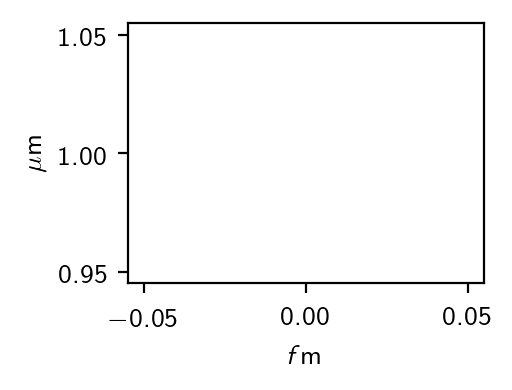

In [9]:
# From https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

mpl.rcParams.update({'figure.dpi': 200})

mpl.rcParams.update({'font.size': 10})

ureg = pint.UnitRegistry()
column = 18*ureg.cm

fig, ax = plt.subplots(1,1,figsize=(column-0.5*ureg.cm).to(ureg.inch).magnitude*np.array([1,0.75])/3)

plt.plot([0,0],[1,1])
plt.xlabel(r"$f$m")
plt.ylabel(r"$\mu$m");

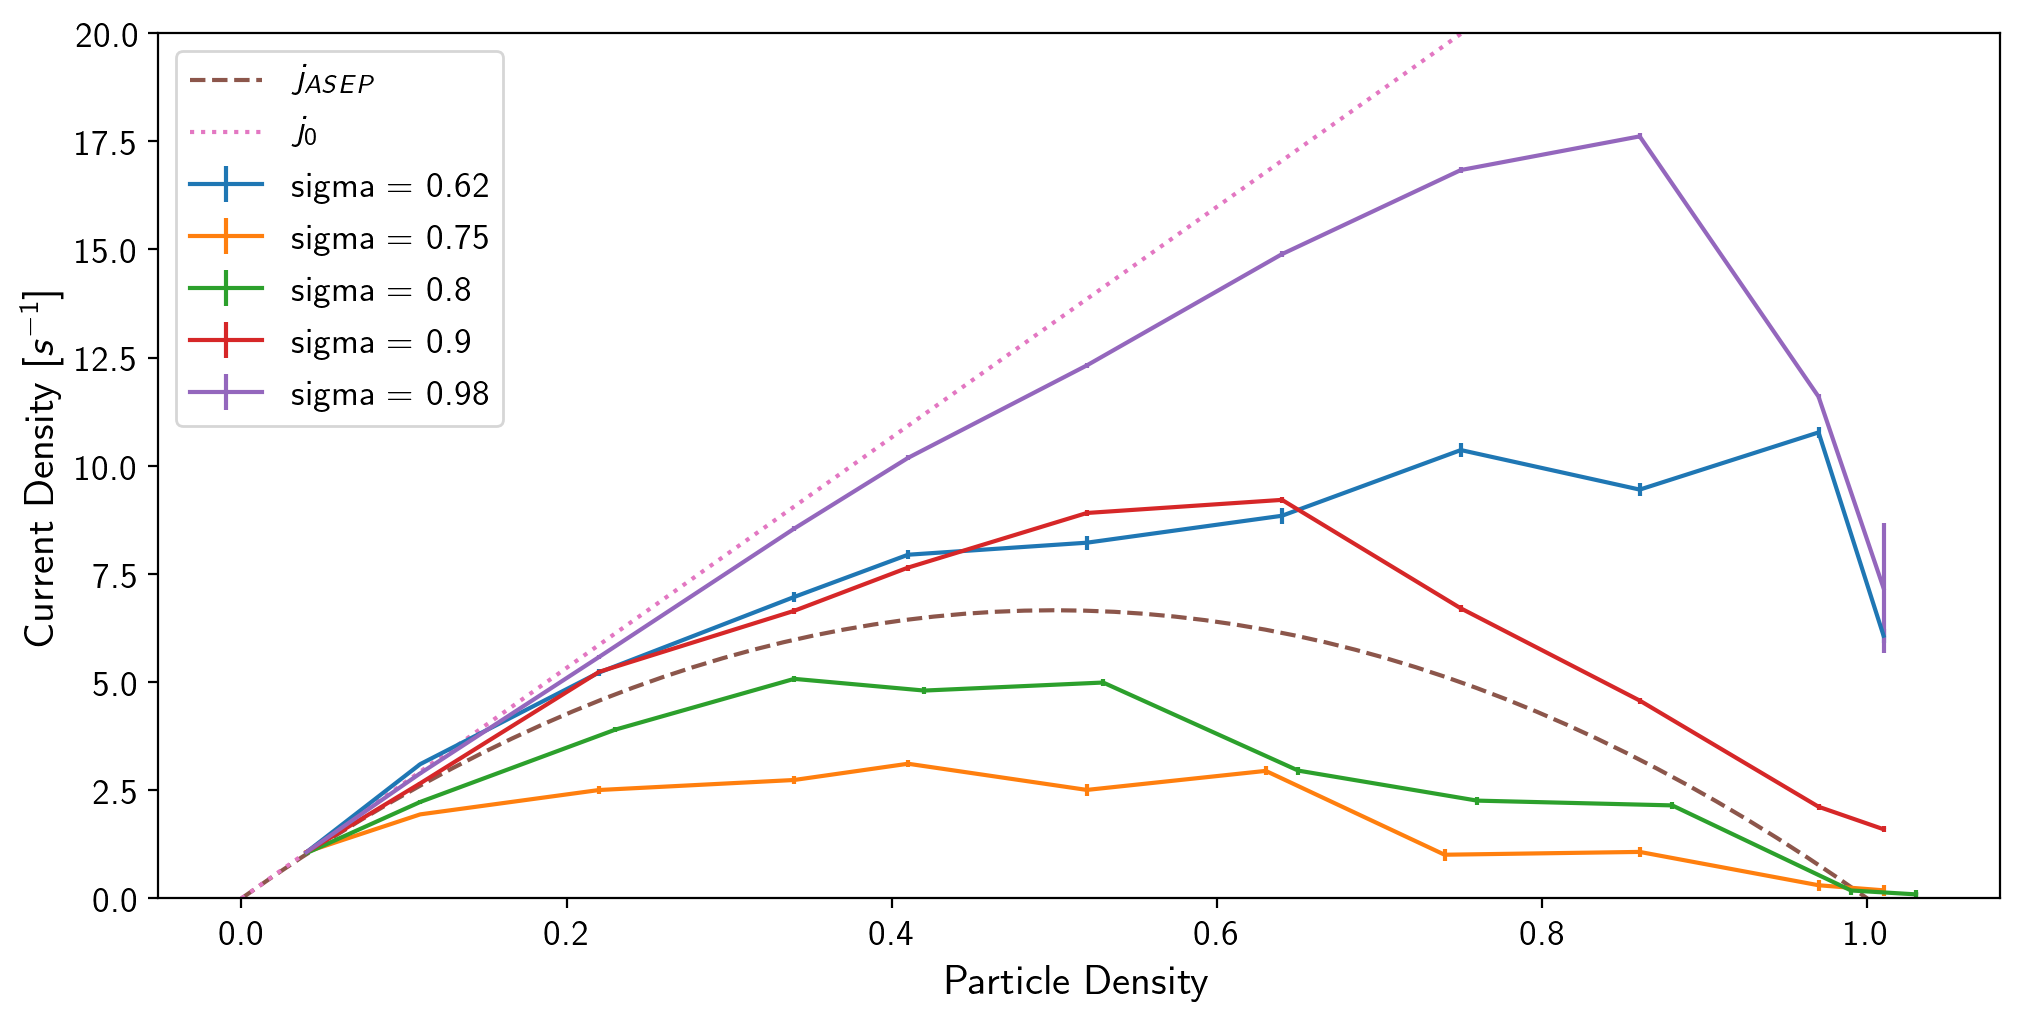

In [11]:
#Plot of means
#To Do: Change plot for error bar polot (error bars with standard deviation)
f1, ax1 = plt.subplots(1,1,constrained_layout=True,figsize=(10,5))
#f2, ax2 = plt.subplots(1,2,constrained_layout=True,figsize=(15,5))

for s, pr in df.groupby('sigma'):

    tag1 = "sigma = {}".format(s)

    #particleDens = Nparticles*wavlen/(2*np.pi*radius)
    #particleDens = np.insert(particleDens, 0, 1/(2*np.pi*radius))

    x = df.loc[idx[s, :, :], :].index.get_level_values("p_density").unique()
    
    mean_codens = df.loc[idx[s, :, :], 'codens'].groupby('p_density').mean()
    mean_norm_codens = df.loc[idx[s, :, :], 'norm_codens'].groupby('p_density').mean()
    mean_fixdens = df.loc[idx[s, :, :], 'fixdens'].groupby('p_density').mean()
    mean_norm_fixdens = df.loc[idx[s, :, :], 'norm_fixdens'].groupby('p_density').mean()

    #ax1[0].plot(x, mean_codens, label=tag1)
    #ax1[1].plot(x, mean_norm_codens, label=tag1)

    #ax2[0].plot(x, mean_fixdens, label=tag1)
    #ax2[1].plot(x, mean_norm_fixdens, label=tag1)

    ax1.errorbar(x, df.loc[idx[s, :, :], 'norm_codens'], df.loc[idx[s, :, :], 'norm_coerror'], label=tag1)


pd_ASEP = np.linspace(0, 1, 55)

co_velSingle = df.loc[idx[:, :, :], 'co_vel'].mean()
mean_ASEP = co_velSingle*pd_ASEP*(1-pd_ASEP)

ax1.plot(pd_ASEP, mean_ASEP/df.loc[idx[:, :, :], 'sing_codens'].mean(), '--', label="$j_{ASEP}$")

co_currDens_0 = co_velSingle*pd_ASEP/df.loc[idx[:, :, :], 'sing_codens'].mean()
ax1.plot(pd_ASEP, co_currDens_0, ':',label='$j_0$')

ax1.set_xlabel("Particle Density", fontfamily="sans-serif",  fontsize=15)
ax1.set_ylabel("Current Density [$s^{-1}$]", fontfamily="sans-serif",  fontsize=15)
ax1.legend(fontsize = 13)
          
ax1.tick_params(labelsize=13)

ax1.set_ylim([0,20])
plt.show();

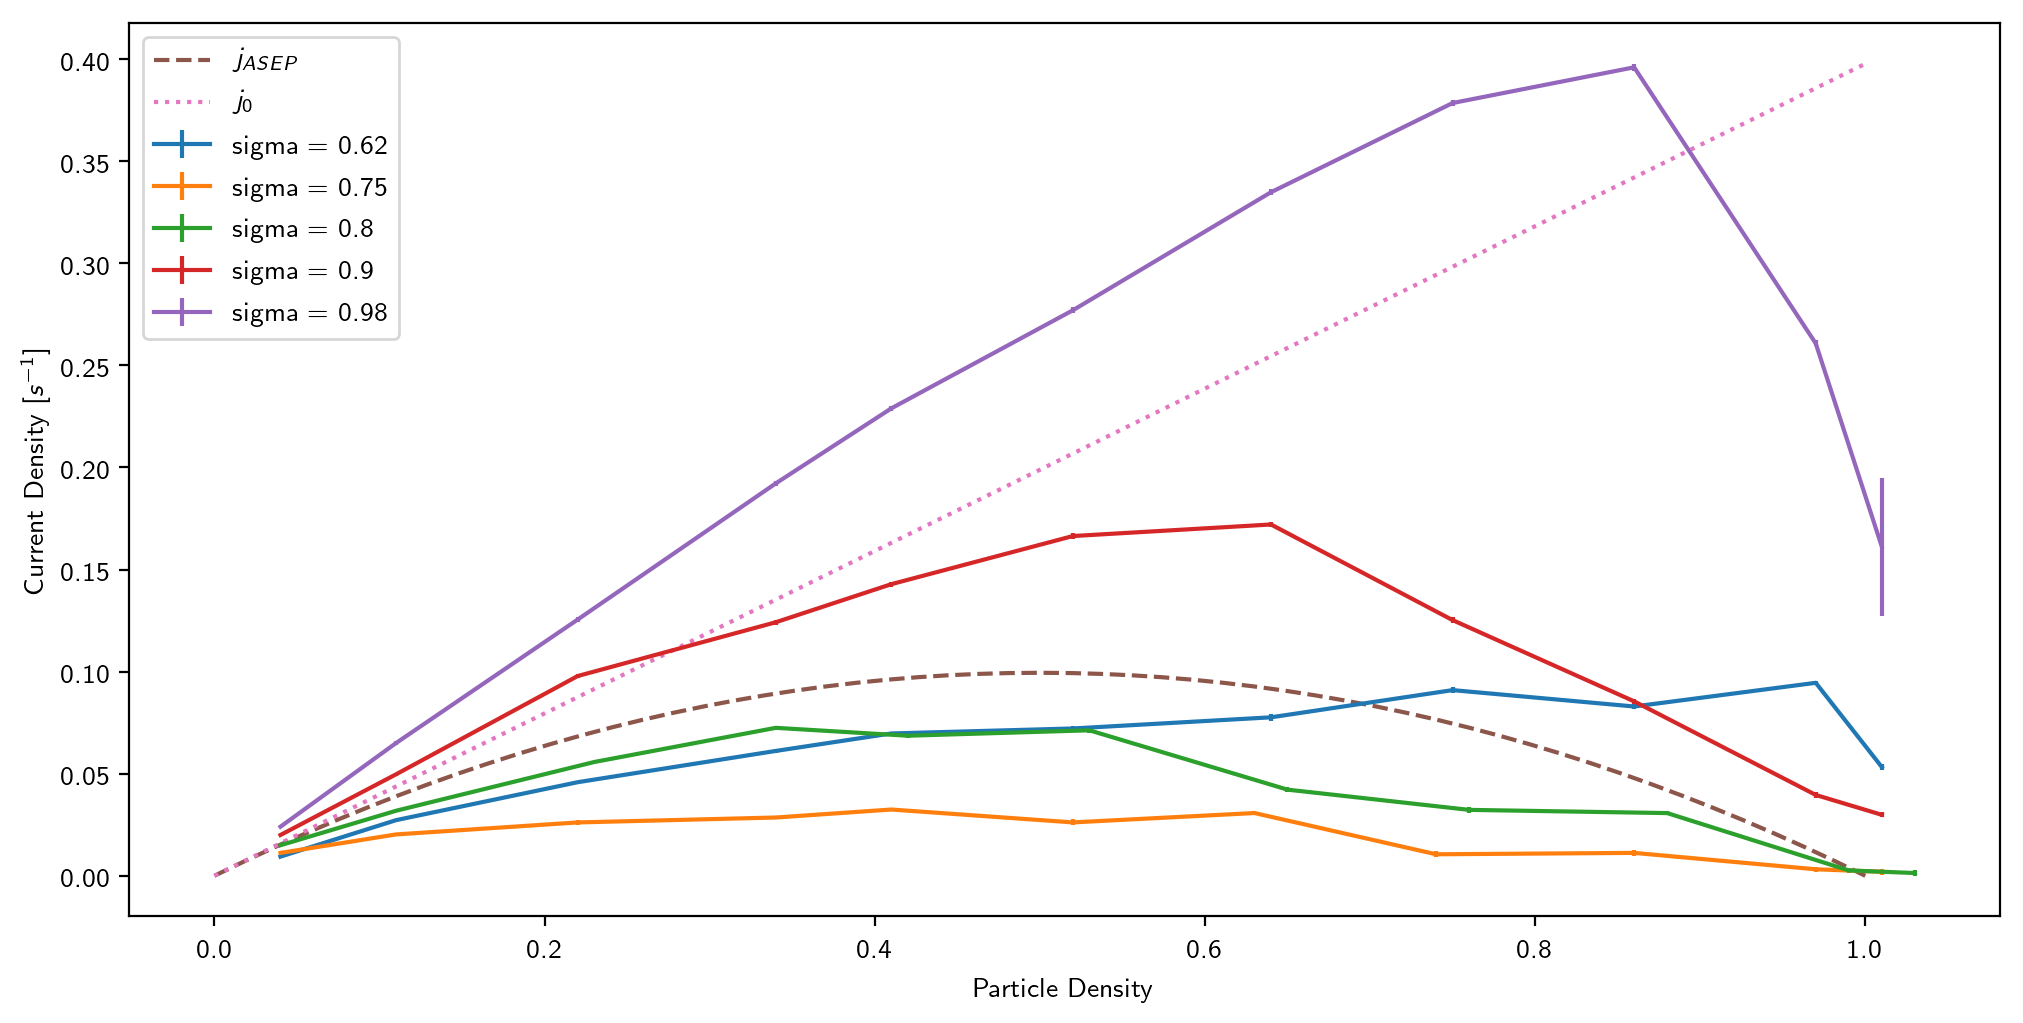

In [68]:
#Plot of means
#To Do: Change plot for error bar polot (error bars with standard deviation)
f1, ax1 = plt.subplots(1,1,constrained_layout=True,figsize=(10,5))
#f2, ax2 = plt.subplots(1,2,constrained_layout=True,figsize=(15,5))

for s, pr in df.groupby('sigma'):

    tag1 = "sigma = {}".format(s)

    #particleDens = Nparticles*wavlen/(2*np.pi*radius)
    #particleDens = np.insert(particleDens, 0, 1/(2*np.pi*radius))

    x = df.loc[idx[s, :, :], :].index.get_level_values("p_density").unique()
    
    mean_codens = df.loc[idx[s, :, :], 'codens'].groupby('p_density').mean()
    mean_norm_codens = df.loc[idx[s, :, :], 'norm_codens'].groupby('p_density').mean()
    mean_fixdens = df.loc[idx[s, :, :], 'fixdens'].groupby('p_density').mean()
    mean_norm_fixdens = df.loc[idx[s, :, :], 'norm_fixdens'].groupby('p_density').mean()

    #ax1[0].plot(x, mean_codens, label=tag1)
    #ax1[1].plot(x, mean_norm_codens, label=tag1)

    #ax2[0].plot(x, mean_fixdens, label=tag1)
    #ax2[1].plot(x, mean_norm_fixdens, label=tag1)

    ax1.errorbar(x, df.loc[idx[s, :, :], 'codens'], df.loc[idx[s, :, :], 'co_error'], label=tag1)


pd_ASEP = np.linspace(0, 1, 55)

co_velSingle = df.loc[idx[:, :, :], 'co_vel'].mean()
mean_ASEP = co_velSingle*pd_ASEP*(1-pd_ASEP)

ax1.plot(pd_ASEP, mean_ASEP, '--', label="$j_{ASEP}$")

co_currDens_0 = co_velSingle*pd_ASEP#/df.loc[idx[:, :, :], 'sing_codens'].mean()
ax1.plot(pd_ASEP, co_currDens_0, ':',label='$j_0$')

ax1.set_xlabel("Particle Density")
ax1.set_ylabel("Current Density [$s^{-1}$]")
ax1.legend()

#ax1.set_ylim([0,20])
plt.show();

NameError: name 'Nparticles' is not defined

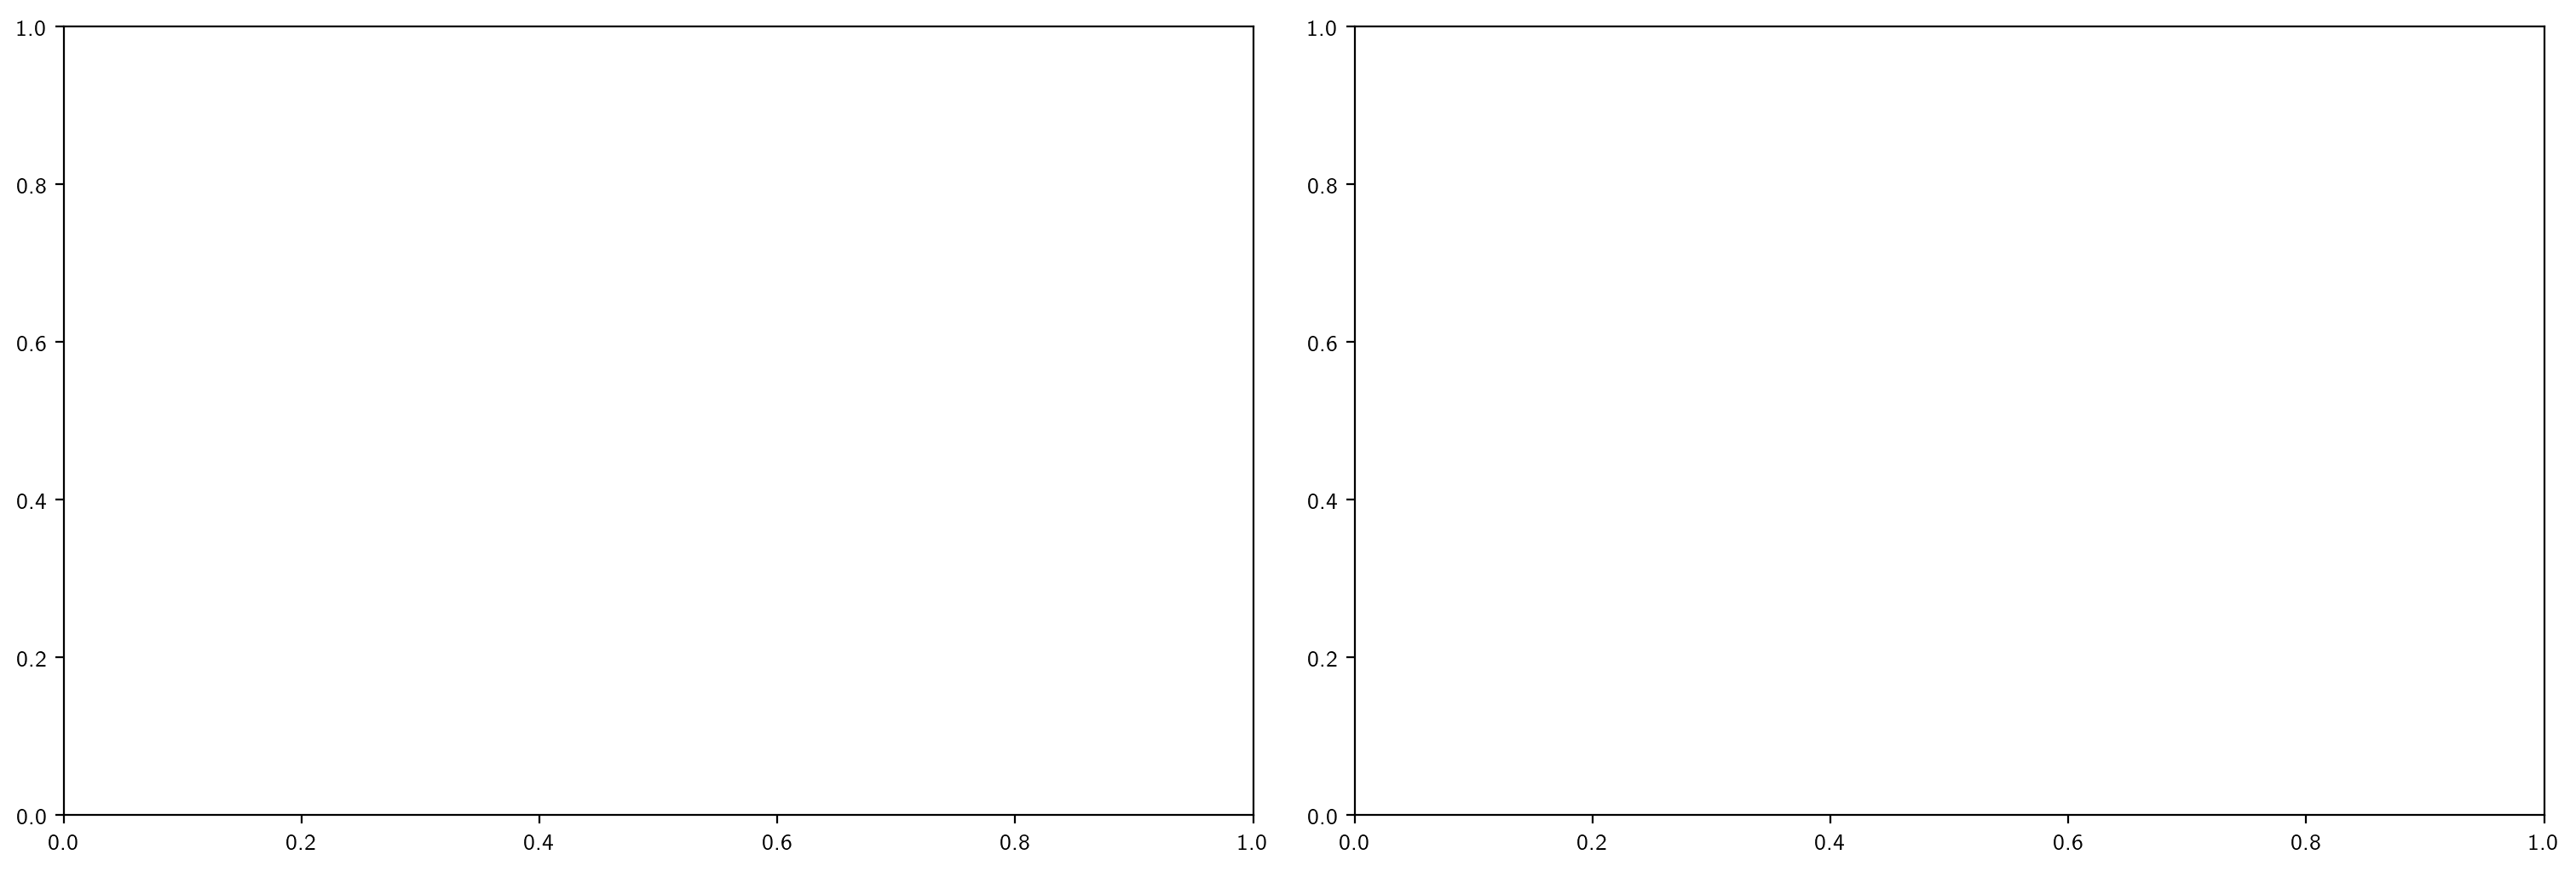

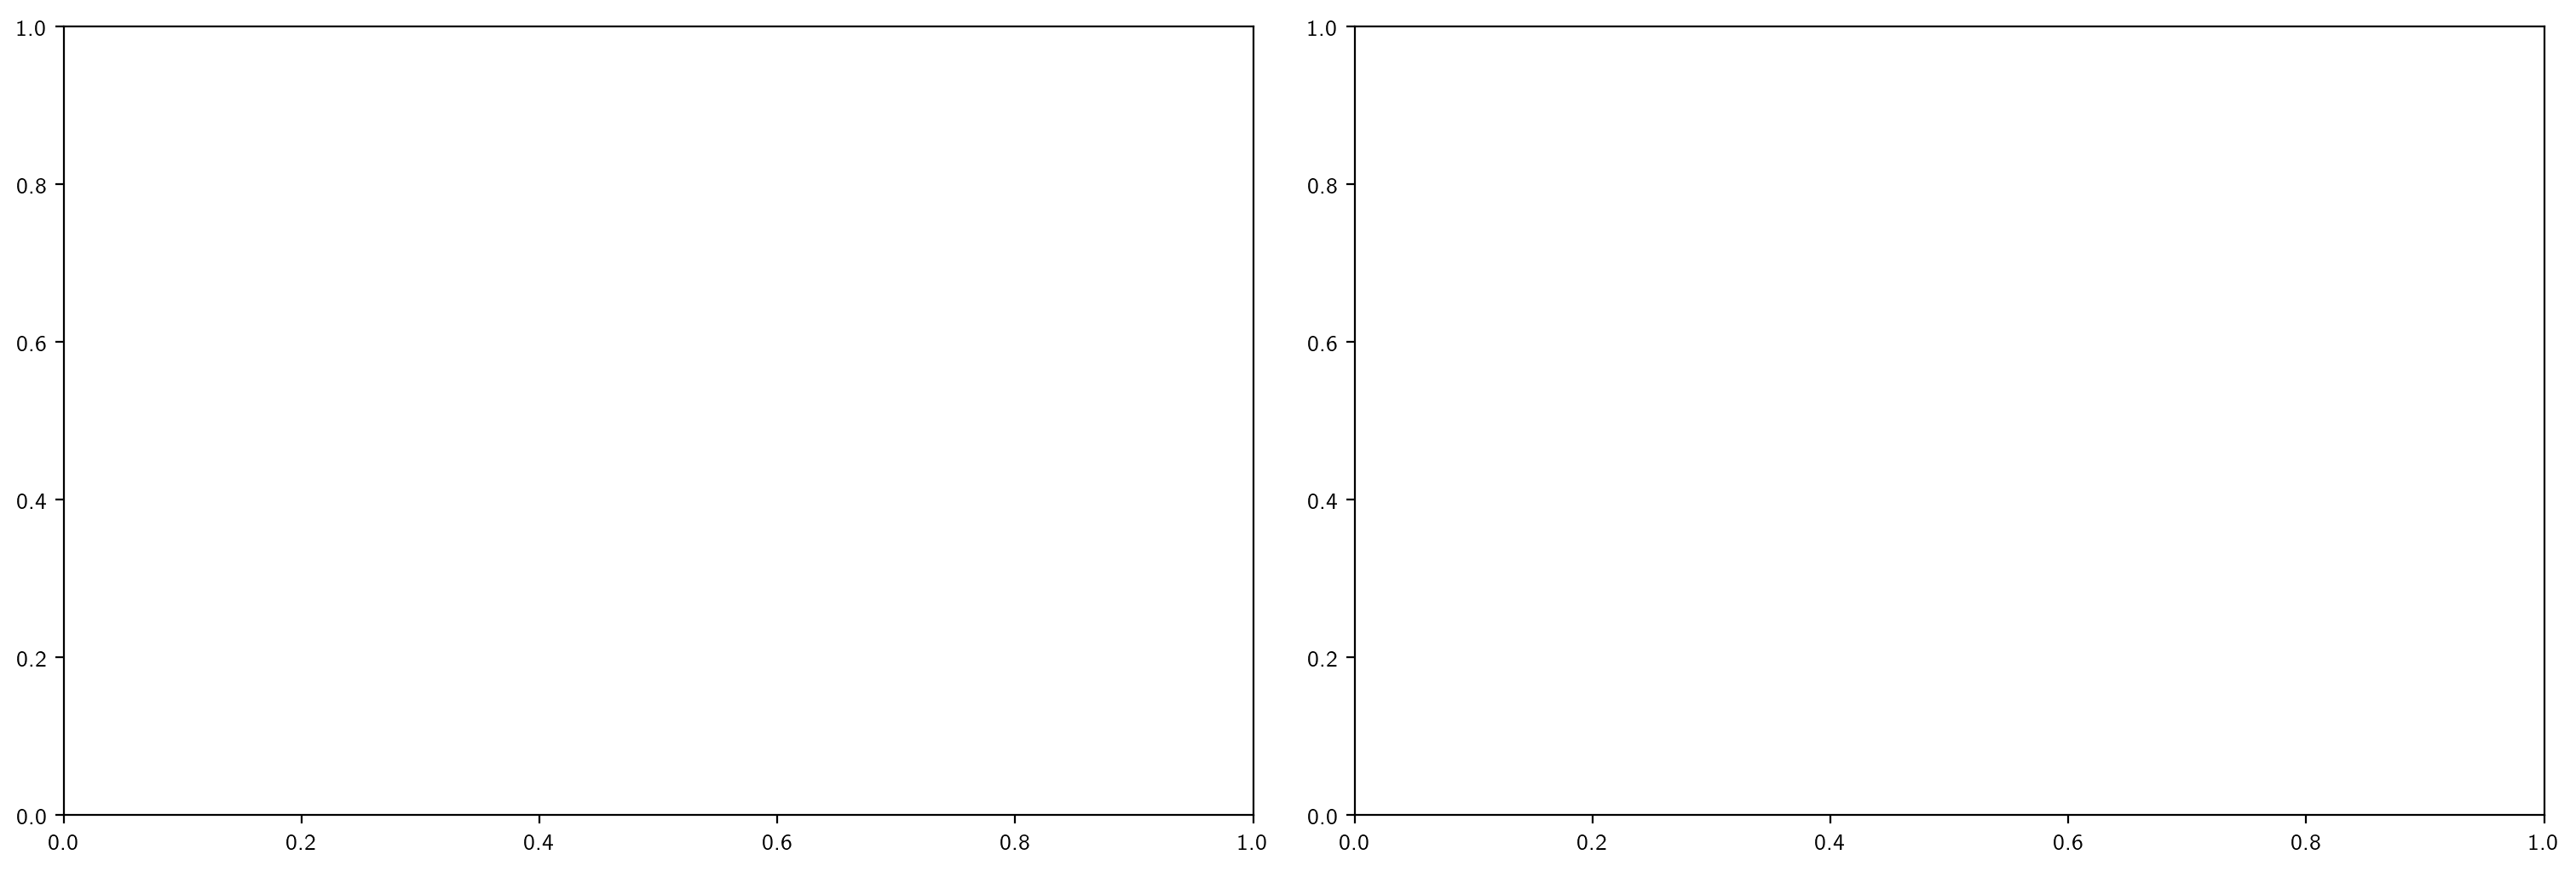

In [5]:
#Plot of individual curves in the same graphic
f1, ax1 = plt.subplots(1,2,constrained_layout=True,figsize=(15,5))
f2, ax2 = plt.subplots(1,2,constrained_layout=True,figsize=(15,5))

tag1 = "sigma = {}".format(s)

particleDens = Nparticles*wavlen/(2*np.pi*radius)

#co_mean = pd.concat([pd.DataFrame([co_cd_single]), pd.DataFrame(co_currentDensity.mean(axis = 1))]).reset_index(drop=True)
#fix_mean = pd.concat([pd.DataFrame([fix_cd_single]), pd.DataFrame(fix_currentDensity.mean(axis = 1))]).reset_index(drop=True)

#print(len(trackFilepaths)-1)
#print(len(trackFilepaths))

for t in tqdm_notebook(np.linspace(0, len(trackFilepaths)-1, len(trackFilepaths), dtype=int)):
    
    if t == 0 or t == 9 or t == 8: #s = 0.75 
    #if t == 3 : #s = 0.8
        #print("Jackpot!")
    #else:
        
        ax1[0].plot(x, df.loc[idx[.75, t, :], 'codens'], label=t)
        ax1[1].plot(x, df.loc[idx[.75, t, :], 'norm_codens'], label=t)

        ax2[0].plot(x, df.loc[idx[.75, t, :], 'fixdens'], label=t)
        ax2[1].plot(x, df.loc[idx[.75, t, :], 'norm_fixdens'], label=t)


ax1[0].plot(pd_ASEP, co_cd_ASEP, '--', label="j ASEP")
ax1[1].plot(pd_ASEP, co_cd_ASEP/np.mean(co_cd_single), '--', label="j ASEP")

ax1[0].set_xlabel("Particle density ")
ax1[0].set_ylabel("Current Density (1/s)")
ax1[0].set_title("No normalized")
ax1[0].legend()

ax1[1].set_xlabel("Particle density ")
#ax1[1].set_ylabel("Current Density (1/s)")
ax1[1].set_title("j0 Normalization")
ax1[1].legend()

ax2[0].set_xlabel("Particle density ")
ax2[0].set_ylabel("Current Density (1/s)")
ax2[0].legend()

ax2[1].set_xlabel("Particle density ")
#ax2[1].set_ylabel("Current Density (1/s)")
ax2[1].set_title("j0 Normalization")
ax2[1].legend()

f1.suptitle("Optical Traps Reference System")
f2.suptitle("External Reference System")
plt.show()